In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
leptop = pd.read_csv('C:\\Users\\Anil modi\\Downloads\\laptop_data.csv')
leptop

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
# let's check the Number of rows and columns
print('Numbers of row in this Dataset is -: ', leptop.shape[0])
print('Numbers of columns in this Dataset is -: ', leptop.shape[1])

Numbers of row in this Dataset is -:  1303
Numbers of columns in this Dataset is -:  12


In [4]:
leptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df = leptop.copy()

In [6]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [7]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.drop_duplicates( inplace = True)

### Ram and Waight

In [9]:
df['Ram'] = df['Ram'].str.replace("GB",'').astype(int)
df['Weight'] = df['Weight'].str.replace('kg','').astype(float)

In [10]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### Company

<Axes: >

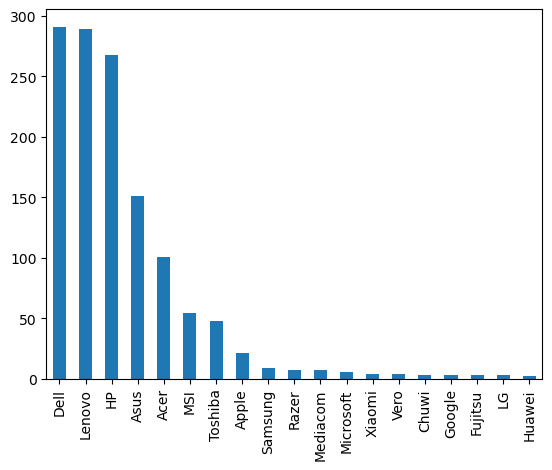

In [11]:
df['Company'].value_counts().plot(kind = 'bar')

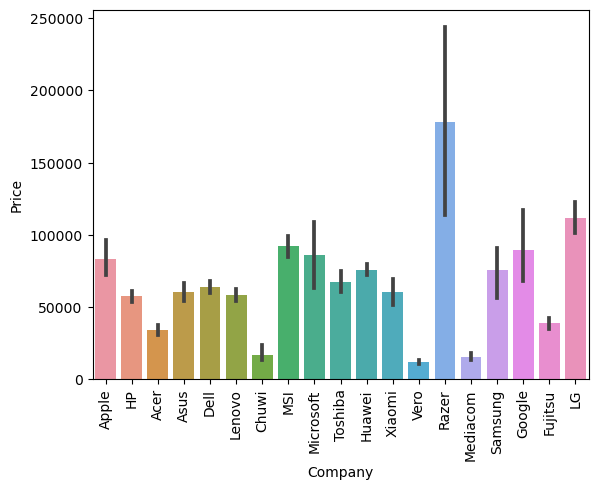

In [12]:
sns.barplot(x =df['Company'], y =df['Price'])  # This graph show average price of leotop of company
plt.xticks(rotation = 'vertical');

#we found that reger compnay ka laptop ha uski average price jyada hotu hia

# SO company are verry on price --

### TypeName

<Axes: >

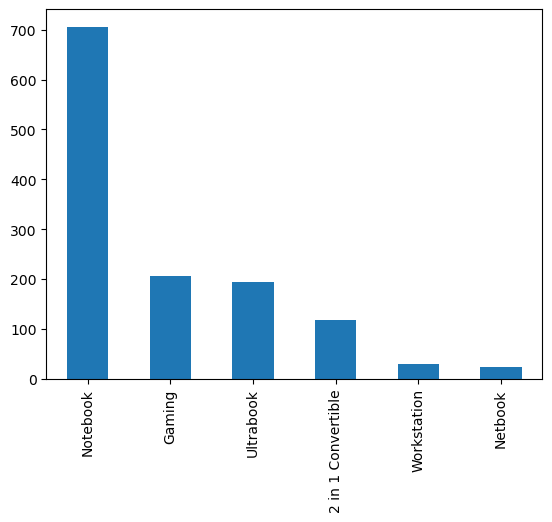

In [13]:
df['TypeName'].value_counts().plot(kind ='bar')
# This graph show most of time quantituy sold Notebook

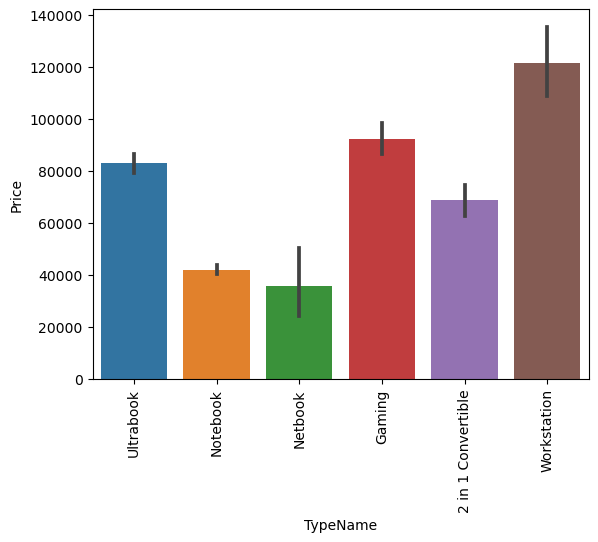

In [14]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation ='vertical');

# SO on an average deka jaye to  workstation vale leptop ki price hai, price varry krtu hia --

### Inches

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_9188\3089386768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

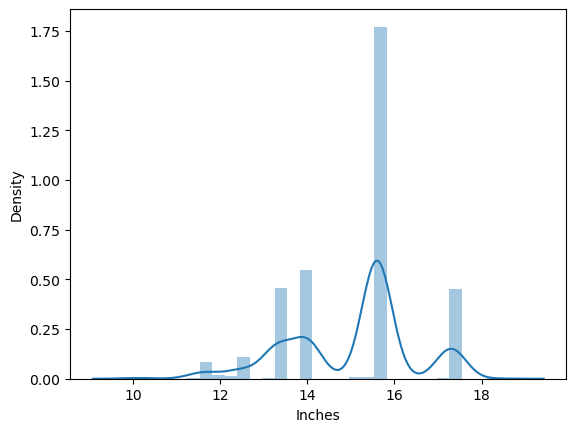

In [15]:
sns.distplot(df['Inches'])

# 15 to 16 inch vale lepotp jyda hai

<Axes: xlabel='Inches', ylabel='Price'>

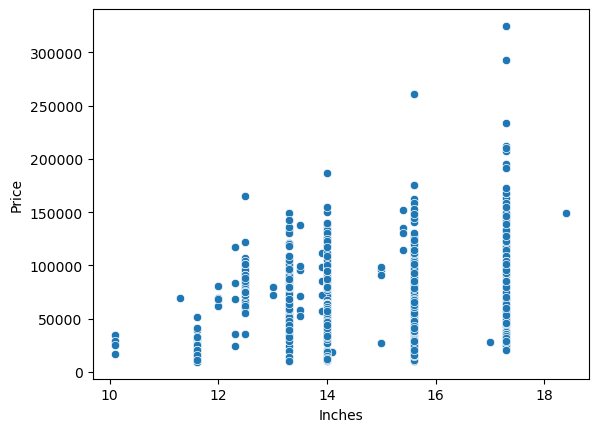

In [16]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

## Thoda correlated hai, inches bdti hai to price me thod bdti he but not more

#### 'ScreenResolution'

      We want extract Revalution, IPS, TouchSCreen, 

In [17]:
df['ScreenResolution'].value_counts().head()

Full HD 1920x1080                            505
1366x768                                     262
IPS Panel Full HD 1920x1080                  226
IPS Panel Full HD / Touchscreen 1920x1080     51
Full HD / Touchscreen 1920x1080               47
Name: ScreenResolution, dtype: int64

#### Create new columns X rev and Y Rev size

In [18]:
rev = df['ScreenResolution'].str.split('x', expand = True)
df['X_rev'] = rev[0].str.split(' ').apply(lambda x:x[-1])
df['Y_rev'] = rev[1]


In [19]:
df['X_rev'] = df['X_rev'].astype(int)
df['Y_rev'] = df['Y_rev'].astype(int)

#### Create new columns TouchScreen

In [20]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

<Axes: >

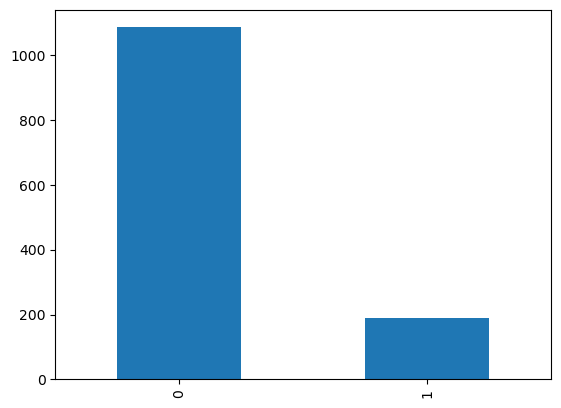

In [21]:
df['Touchscreen'].value_counts().plot(kind ='bar')

# Most of the leptop are Non Touchscreen

<Axes: xlabel='Touchscreen', ylabel='Price'>

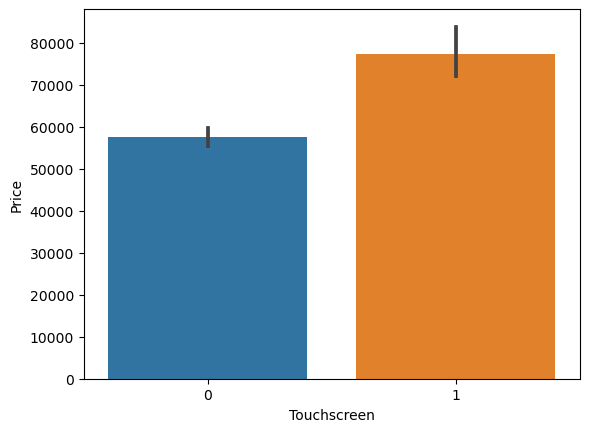

In [22]:
sns.barplot(x =df['Touchscreen'], y = df['Price'])

# touchscreen laptop price are higher than non touchscree

#### create new columns IPS panel


In [23]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)


<Axes: >

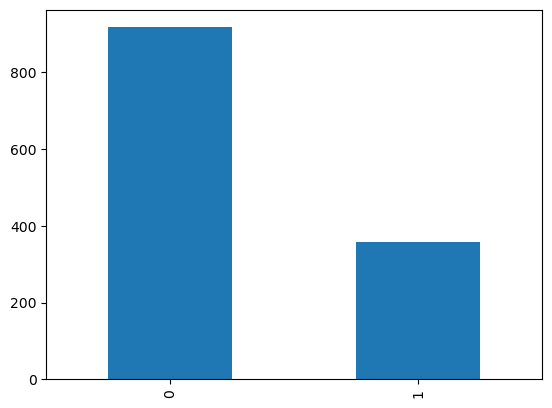

In [24]:
df['IPS'].value_counts().plot(kind = 'bar')

# Non ips panel leptop are more as compareto ips panle

<Axes: xlabel='IPS', ylabel='Price'>

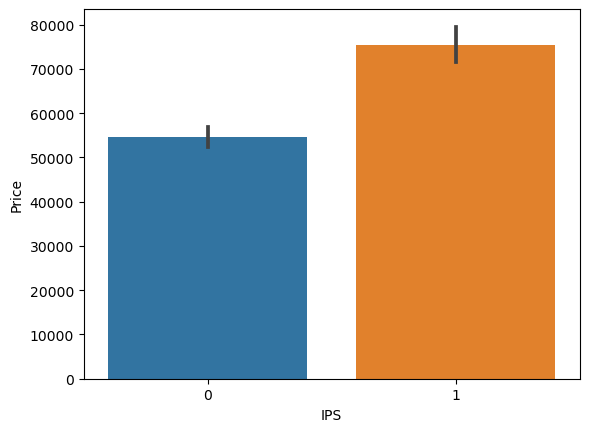

In [25]:
sns.barplot(x = df['IPS'], y=df['Price'])

# IPS Panel leptop price are higher than non panel

In [26]:
df.corr()['Price']

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_9188\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
X_rev          0.552074
Y_rev          0.548111
Touchscreen    0.188631
IPS            0.250358
Name: Price, dtype: float64

#### let;s create new columns ppi (this is importtant component in lepotp)

In [27]:
df['ppi']  =(((df['X_rev']**2) + (df['Y_rev']**2))** 0.5/ df['Inches']).astype(float)

In [28]:
df.corr()['Price']

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_9188\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
X_rev          0.552074
Y_rev          0.548111
Touchscreen    0.188631
IPS            0.250358
ppi            0.469539
Name: Price, dtype: float64

In [29]:
## Show now we can deleted these columns 
## ['ScreenResolution', Inches, X_rev. Y_rev]

df.drop(['ScreenResolution', 'Inches', 'X_rev', 'Y_rev'], axis =1, inplace = True)

### CPU

In [30]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

In [31]:
df['Cpu_name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [32]:
def fetch_text(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [33]:
df['Cpu_brand'] = df['Cpu_name'].apply(fetch_text)

<Axes: >

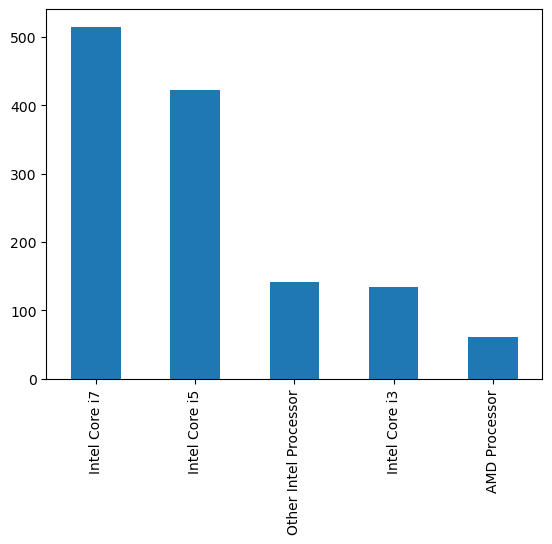

In [34]:
df['Cpu_brand'].value_counts().plot(kind ='bar')

# Intel core i7 and i5 are most lepopt sold

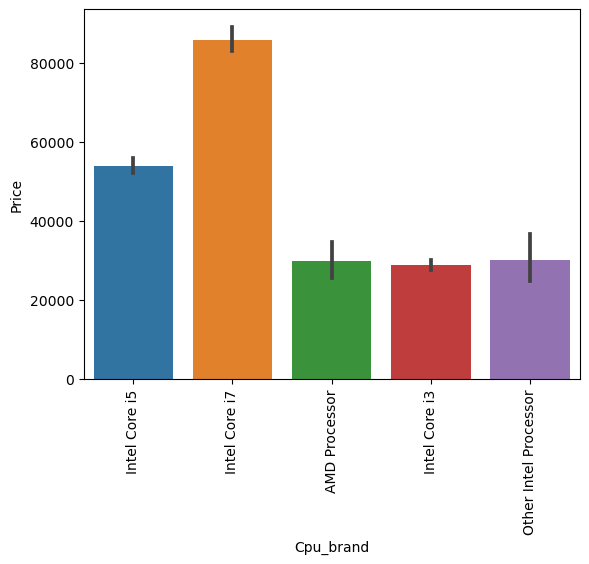

In [35]:
sns.barplot(x = df['Cpu_brand'], y = df['Price'])
plt.xticks(rotation = 'vertical');

#higher price of Ingter core i7 and i5
## but left all processor are price average almost same

In [36]:
df.drop(['Cpu', 'Cpu_name'], axis  =1, inplace = True)

#### Ram

<Axes: >

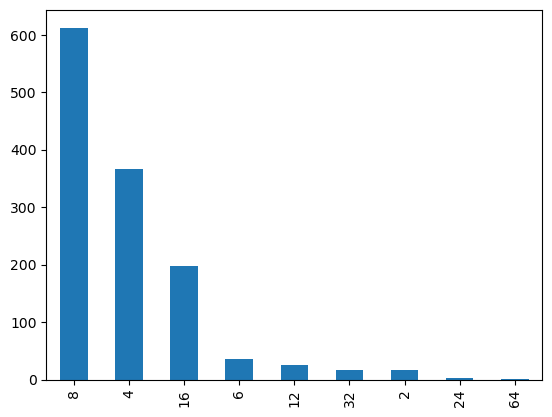

In [37]:
df['Ram'].value_counts().plot(kind = 'bar')

# Most of the leptop have 8 gb ram

<Axes: xlabel='Ram', ylabel='Price'>

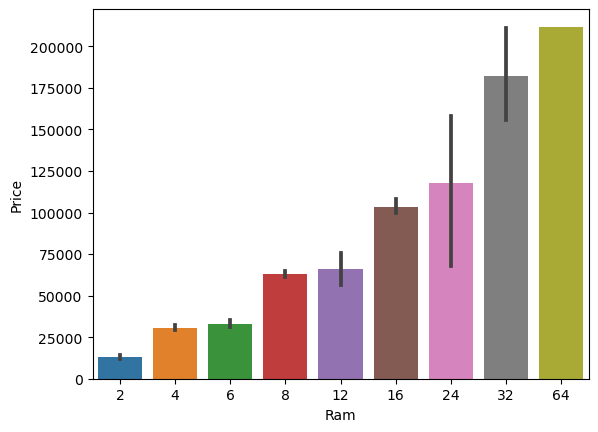

In [38]:
sns.barplot(x = df['Ram'], y = df['Price'])

# Ram and price are highely correlated , whan ram are incrwase and price are also increase

#### Memory

In [39]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '') # Replace
df['Memory'] = df['Memory'].str.replace('TB', '') # Replace

# creare new datafrem
new = df['Memory'].str.split('+', n=1, expand = True)

df['First'] = new[0]
df['Second'] = new[1]

df['First'] = df['First'].str.strip()  # remove extraa spaces

df['Layter1HDD'] = df['First'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layter1SSD'] = df['First'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layter1Hybrid'] = df['First'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layter1Flash Storage'] = df['First'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df['First'] = df['First'].str.replace(r'\D', '')  # remove str values, left onlt numerical values

df['Second'].fillna('0', inplace = True)

df['Layter2HDD'] = df['Second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layter2SSD'] = df['Second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layter2Hybrid'] = df['Second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layter2Flash Storage'] = df['Second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)


df['Second'] = df['Second'].str.replace(r'\D', '')  # remove str values, left onlt numerical values

df['First'] = df['First'].astype(int)
df['Second'] = df['Second'].astype(int)

df['HDD'] = (df['First'] * df['Layter1HDD'] + df['Second'] * df['Layter2HDD'])
df['SDD'] = (df['First'] * df['Layter1SSD'] + df['Second'] * df['Layter2SSD'])
df['Hybrid'] = (df['First'] * df['Layter1Hybrid'] + df['Second'] * df['Layter2Hybrid'])
df['Flash Storage'] = (df['First'] * df['Layter1Flash Storage'] + df['Second'] * df['Layter2Flash Storage'])

df.drop(columns = ['First', 'Second', 'Layter1HDD', 'Layter1SSD', 'Layter1Hybrid', 'Layter1Flash Storage',
                  'Layter2HDD','Layter2SSD', 'Layter2Hybrid', 'Layter2Flash Storage'], inplace = True)


C:\Users\Anil modi\AppData\Local\Temp\ipykernel_9188\2403834590.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['First'] = df['First'].str.replace(r'\D', '')  # remove str values, left onlt numerical values
C:\Users\Anil modi\AppData\Local\Temp\ipykernel_9188\2403834590.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second'] = df['Second'].str.replace(r'\D', '')  # remove str values, left onlt numerical values


In [40]:
df.drop('Memory', axis =1, inplace = True)

In [41]:
df.corr()['Price']

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_9188\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
IPS              0.250358
ppi              0.469539
HDD             -0.226872
SDD              0.544443
Hybrid          -0.005205
Flash Storage   -0.037176
Name: Price, dtype: float64

In [42]:
df.drop(['Hybrid','Flash Storage'], axis =1, inplace = True)

#### GPU

In [43]:
df['Gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [44]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [45]:
df =df[df['Gpu_brand'] !='ARM']

<Axes: >

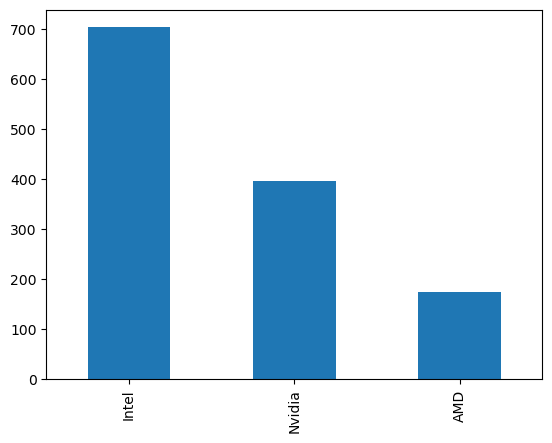

In [46]:
df['Gpu_brand'].value_counts().plot(kind = 'bar')

# Most of the buy intel brand lepopt

<Axes: xlabel='Gpu_brand', ylabel='Price'>

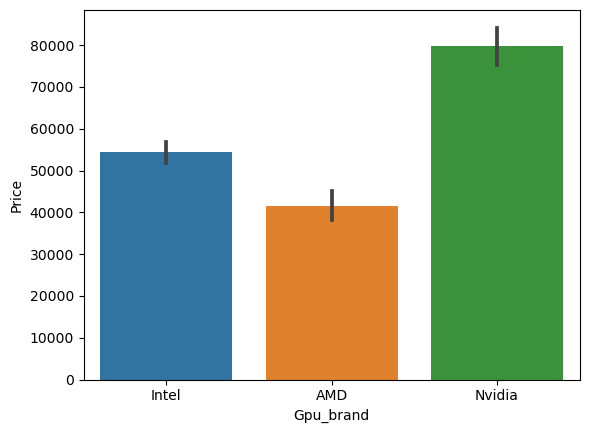

In [47]:
sns.barplot(x = df['Gpu_brand'], y = df['Price'])

## Most of the price higher of NVidia brand 

In [48]:
df.drop('Gpu', axis =1, inplace = True)

#### OpSys

In [49]:
df['OpSys'].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [50]:
def text_solve(win):
    if win == 'Windows 10' or win == 'Windows 7' or win == 'Windows 10 S':
        return 'Window'
    elif win == 'macOS' or win == 'Mac OS X':
        return 'Mac'
    else:
        return 'Linux/Chrome OS/Android/Other'
        

In [51]:
df['Os'] = df['OpSys'].apply(text_solve)

In [52]:
df.drop('OpSys', axis =1, inplace = True)

In [53]:
df['Os'].value_counts()

Window                           1100
Linux/Chrome OS/Android/Other     152
Mac                                21
Name: Os, dtype: int64

<Axes: xlabel='Os', ylabel='Price'>

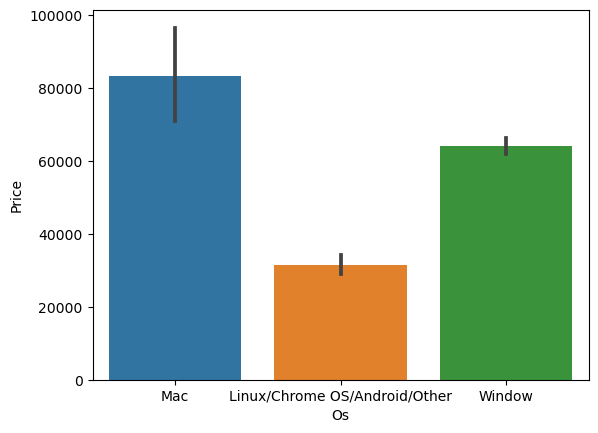

In [54]:
sns.barplot(x = df['Os'], y = df['Price'])

# SO HIgher price of Mac laptop

#### Waight

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_9188\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

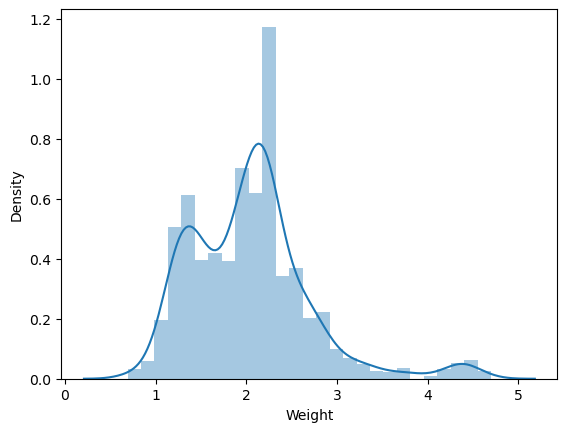

In [55]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

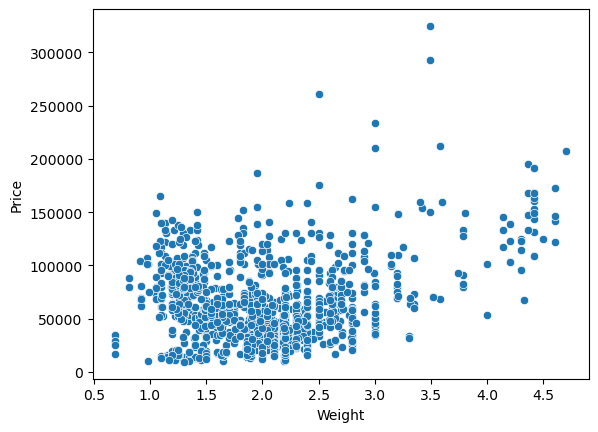

In [56]:
sns.scatterplot(x = df['Weight'], y =df['Price'])

## Thoda correlated hai, kyoki corr thoda hia

#### Price

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_9188\2769591991.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

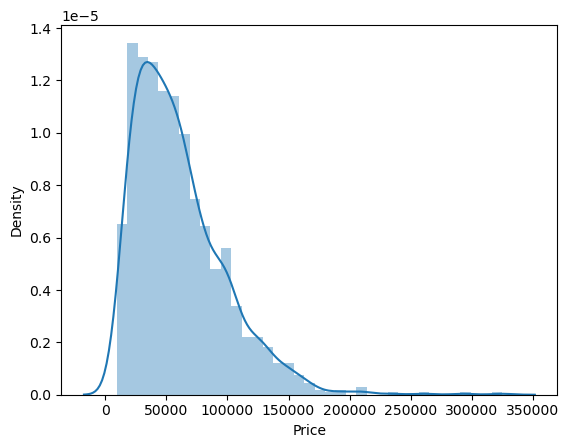

In [57]:
sns.distplot(df['Price'])

## Curve if Left squed so we conver into normal

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_9188\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

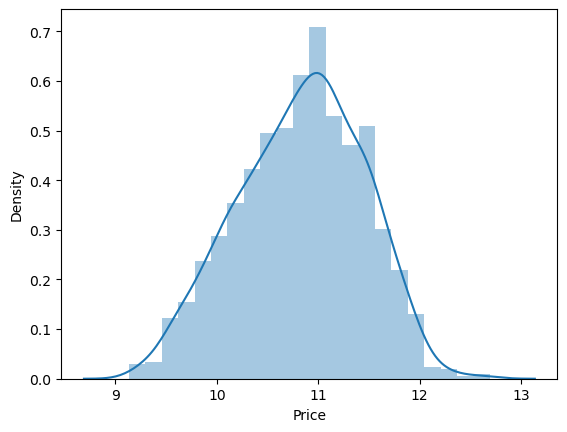

In [58]:
sns.distplot(np.log(df['Price']))

## Create Model

In [59]:
x = df.drop('Price', axis =1)
y = np.log(df['Price'])

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state =42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1082, 12), (191, 12), (1082,), (191,))

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


## Regressor

In [62]:
x.head(1)

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu_brand,HDD,SDD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


In [63]:
step1 = ColumnTransformer(transformers = [('one_hot', OneHotEncoder(sparse= False, drop = 'first'), [0,1,7,10,11])],
                                      remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ( 'step1', step1),
    ('step2', step2)])

pipe.fit(x_train, y_train)

y_pred =pipe.predict(x_test)

print('accuracy ', r2_score(y_test, y_pred))
print('Error ', mean_absolute_error(y_test, y_pred))

accuracy  0.7985568480424116
Error  0.2187618617034191


C:\Users\Anil modi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Lasso Ridg

In [64]:
step1 = ColumnTransformer(transformers = [('one_hot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,7,10,11])],
                         remainder = 'passthrough')

step2 = Lasso(alpha =0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('accuracy in lasso ', r2_score(y_test, y_pred))
print('Error in lasso', mean_absolute_error(y_test, y_pred))


accuracy in lasso  0.7983821067256969
Error in lasso 0.22091020181300577


C:\Users\Anil modi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Ridge ridggression

In [65]:
step1 = ColumnTransformer(transformers = [('one_hot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,7,10,11])],
                         remainder = 'passthrough')

step2 = Ridge(alpha =10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('accuracy in ridge ', r2_score(y_test, y_pred))
print('Error in ridge', mean_absolute_error(y_test, y_pred))


accuracy in ridge  0.7959425126400257
Error in ridge 0.2214229290964346


C:\Users\Anil modi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## KNN

In [66]:
#step1 = ColumnTransformer(transformers = [('one_hot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,7,10,11])],
#                          remainder = 'passthrough')
#
#step2 = KNeighborsRegressor(n_neighbors =5)
#
#pipe = Pipeline([
#    ('step1', step1),
#    ('step2', step2)])
#
#pipe.fit(x_train, y_train)

#y_pred = pipe.predict(x_test)

#print('accuracy in knn ', r2_score(y_test, y_pred))
#print('Error in knn', mean_absolute_error(y_test, y_pred))

## Decsion tree

In [67]:
step1 = ColumnTransformer(transformers = [('one_hot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,7,10,11])],
                         remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth =9)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('accuracy in decsion ', r2_score(y_test, y_pred))
print('Error in decsion', mean_absolute_error(y_test, y_pred))


accuracy in decsion  0.8296775918237408
Error in decsion 0.19445530362644747


C:\Users\Anil modi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## SVM

In [68]:
step1 = ColumnTransformer(transformers = [('one_hot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,7,10,11])],
                         remainder = 'passthrough')

step2 =SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('accuracy in svm ', r2_score(y_test, y_pred))
print('Error in svm', mean_absolute_error(y_test, y_pred))


C:\Users\Anil modi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


accuracy in svm  0.8181685228232469
Error in svm 0.1954825422416457


## Random Forest

In [69]:
step1 = ColumnTransformer(transformers = [('one_hot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,7,10,11])],
                         remainder = 'passthrough')

step2 =RandomForestRegressor(n_estimators=350,
                              random_state=3,
                              max_samples=0.6,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('accuracy in random ', r2_score(y_test, y_pred))
print('Error in random', mean_absolute_error(y_test, y_pred))


C:\Users\Anil modi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


accuracy in random  0.862810568676243
Error in random 0.17584402181729356


### SO we selected Randomforsrt

In [76]:
step1 = ColumnTransformer(transformers = [('one_hot', OneHotEncoder(sparse = False, drop = 'first'), [0,1,7,10,11])],
                         remainder = 'passthrough')

step2 =RandomForestRegressor(n_estimators=350,
                              random_state=3,
                              max_samples=0.6,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('accuracy in random ', r2_score(y_test, y_pred))
print('Error in random', mean_absolute_error(y_test, y_pred))


C:\Users\Anil modi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


accuracy in random  0.862810568676243
Error in random 0.17584402181729356


In [78]:
import pickle

pickle.dump(df,open('data2.pkl','wb'))
pickle.dump(pipe, open('pipe2.pkl', 'wb'))